In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline
import calendar

In [595]:
cols_to_use = ['From Date', 'To Date', 'PM2.5','PM10','SO2','NO2']
df = pd.read_excel('ass1_data.xlsx', index_col=0, skiprows=16, usecols = cols_to_use, dropna = True)
df = df[df["SO2"] != "None"]
df = df[df["NO2"] != "None"]
df = df[df["PM2.5"] != "None"]
df = df[df["PM10"] != "None"]
df = df.reset_index()
df.index +=1
df["Month"] = df["From Date"].str[3:5]
df["Date-Month"] = df["From Date"].str[:5]
df["To Date"] = df["To Date"].str[:10]
df["From Date"] = df["From Date"].str[:10]
df

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,From Date,To Date,PM2.5,PM10,NO2,SO2,Month,Date-Month
1,01-01-2019,02-01-2019,380.23,555.57,146.5,15.56,01,01-01
2,02-01-2019,03-01-2019,418.47,622.37,132.76,14.59,01,02-01
3,03-01-2019,04-01-2019,412.89,570.4,134.3,9.99,01,03-01
4,04-01-2019,05-01-2019,291.95,431.19,107.19,5.81,01,04-01
5,05-01-2019,06-01-2019,241.67,343.16,85.87,6.63,01,05-01
...,...,...,...,...,...,...,...,...
348,27-12-2019,28-12-2019,292.34,426.05,246.23,9.09,12,27-12
349,28-12-2019,29-12-2019,336.75,500.48,331.13,12.24,12,28-12
350,29-12-2019,30-12-2019,359.65,517.02,215.1,11.83,12,29-12
351,30-12-2019,31-12-2019,369.66,500.67,63.66,8.56,12,30-12


In [596]:
#SO2 = df.groupby('Month').agg({'SO2': ["mean"]})
#df['From Date'] = pd.to_datetime(df['From Date'], format='%d%m%Y')
df["PM10"] = df["PM10"].astype(float)
df["SO2"] = df["SO2"].astype(float)
df["NO2"] = df["NO2"].astype(float)
dframe = df.groupby('Month').mean()

In [597]:
dframe.dtypes

PM2.5    float64
PM10     float64
NO2      float64
SO2      float64
dtype: object

In [598]:
dframe = dframe.reset_index()
df.head(30)

,From Date,To Date,PM2.5,PM10,NO2,SO2,Month,Date-Month
1,01-01-2019,02-01-2019,380.23,555.57,146.50,15.56,01,01-01
2,02-01-2019,03-01-2019,418.47,622.37,132.76,14.59,01,02-01
3,03-01-2019,04-01-2019,412.89,570.40,134.30,9.99,01,03-01
4,04-01-2019,05-01-2019,291.95,431.19,107.19,5.81,01,04-01
5,05-01-2019,06-01-2019,241.67,343.16,85.87,6.63,01,05-01
6,06-01-2019,07-01-2019,191.85,275.35,88.34,5.15,01,06-01
7,07-01-2019,08-01-2019,197.84,303.64,111.34,7.88,01,07-01
8,08-01-2019,09-01-2019,152.66,246.71,97.46,7.22,01,08-01
9,09-01-2019,10-01-2019,155.26,276.36,103.86,8.46,01,09-01
10,10-01-2019,11-01-2019,205.47,395.21,125.18,10.76,01,10-01


In [599]:
for ind in df.index:
    so2c = df.loc[ind, "SO2"]
    no2c = df.loc[ind, "NO2"]
    pm25 = df.loc[ind, "PM2.5"]
    pm10 = df.loc[ind, "PM10"]
    if (pm10 < 51):
        df.loc[ind, "I_PM10"] = (50-0) * (pm10-0) /(50-0) + 0
    elif (pm10 < 101):
        df.loc[ind, "I_PM10"] = (100-51) * (pm10 - 51) / (100 - 51) + 51
    elif (pm10 < 251):
        df.loc[ind, "I_PM10"] = (200-101) * (pm10 - 101) / (250 - 101) + 101
    elif (pm10 < 351):
        df.loc[ind, "I_PM10"] = (300-201) * (pm10 - 251) / (350 - 251) + 201
    elif (pm10 < 431):
        df.loc[ind, "I_PM10"] = (400-301) * (pm10 - 351) / (430 - 351) + 301
    else :
        df.loc[ind, "I_PM10"] = 500
        
    if (so2c < 41):
        df.loc[ind, "I_SO2"] = (50-0) * (so2c-0) /(40-0) + 0
    elif (so2c < 81):
        df.loc[ind, "I_SO2"] = (100-51) * (so2c - 41) / (80 - 41) + 51
    elif (so2c < 381):
        df.loc[ind, "I_SO2"] = (200-101) * (so2c - 81) / (380 - 81) + 101
    elif (so2c < 801):
        df.loc[ind, "I_SO2"] = (300-201) * (so2c - 381) / (800 - 381) + 201
    elif (so2c < 1601):
        df.loc[ind, "I_SO2"] = (400-301) * (so2c - 801) / (1600 - 801) + 301
    else :
        df.loc[ind, "I_SO2"] = 500
    
    if (pm25 < 31):
        df.loc[ind, "I_PM2.5"] = (50-0) * (pm25 - 0) / (30-0)+ 0
    elif (pm25 < 61):
        df.loc[ind, "I_PM2.5"] = (100-51) * (pm25 - 31)/ (60-31) + 51
    elif (pm25 < 91):
        df.loc[ind, "I_PM2.5"] = (200-101) * (pm25 - 61)/(90-61) + 101
    elif (pm25 < 121):
        df.loc[ind, "I_PM2.5"] = (300-201) * (pm25 - 91)/(120-91) + 201
    elif (pm25 < 251):
        df.loc[ind, "I_PM2.5"] = (400-301) * (pm25 - 121)/(250-121) + 301
    else:
        df.loc[ind, "I_PM2.5"] = 500
        
    if (no2c < 41):
        df.loc[ind, "I_NO2"] = (50-0) * (no2c - 0) / (40-0)+ 0
    elif (no2c < 81):
        df.loc[ind, "I_NO2"] = (100-51) * (no2c - 41)/ (80-41) + 51
    elif (no2c < 181):
        df.loc[ind, "I_NO2"] = (200-101) * (no2c - 81)/(180-81)+101
    elif (no2c < 281):
        df.loc[ind, "I_NO2"] = (300-201) * (no2c -181)/(280-181)+ 201
    elif (no2c < 401):
        df.loc[ind, "I_NO2"] = (400-301) * (no2c - 281)/(400-281) + 301
    else:
        df.loc[ind, "I_NO2"] = 500

    df["I_PM2.5"] = df["I_PM2.5"].astype(float)
    df.loc[ind, "AQI"] = max(df.loc[ind, "I_PM2.5"],df.loc[ind, "I_PM10"],df.loc[ind, "I_SO2"],df.loc[ind, "I_NO2"])
    if (df.loc[ind, "AQI"] <=50):
        df.loc[ind, "AQI_category"] = "Good"
    elif (df.loc[ind, "AQI"] <=100):
        df.loc[ind, "AQI_category"] = "Satisfactory"
    elif (df.loc[ind, "AQI"] <=200):
        df.loc[ind, "AQI_category"] = "Moderate" 
    elif (df.loc[ind, "AQI"] <=300):
        df.loc[ind, "AQI_category"] = "Poor"
    elif (df.loc[ind, "AQI"] <=400):
        df.loc[ind, "AQI_category"] = "Very poor"
    else:
        df.loc[ind, "AQI_category"] = "Severe"
df

,From Date,To Date,PM2.5,PM10,NO2,SO2,Month,Date-Month,I_PM10,I_SO2,I_PM2.5,I_NO2,AQI,AQI_category
1,01-01-2019,02-01-2019,380.23,555.57,146.50,15.56,01,01-01,500.00,19.4500,500.000000,166.500000,500.000000,Severe
2,02-01-2019,03-01-2019,418.47,622.37,132.76,14.59,01,02-01,500.00,18.2375,500.000000,152.760000,500.000000,Severe
3,03-01-2019,04-01-2019,412.89,570.40,134.30,9.99,01,03-01,500.00,12.4875,500.000000,154.300000,500.000000,Severe
4,04-01-2019,05-01-2019,291.95,431.19,107.19,5.81,01,04-01,500.00,7.2625,500.000000,127.190000,500.000000,Severe
5,05-01-2019,06-01-2019,241.67,343.16,85.87,6.63,01,05-01,293.16,8.2875,393.607209,105.870000,393.607209,Very poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,27-12-2019,28-12-2019,292.34,426.05,246.23,9.09,12,27-12,395.05,11.3625,500.000000,266.230000,500.000000,Severe
349,28-12-2019,29-12-2019,336.75,500.48,331.13,12.24,12,28-12,500.00,15.3000,500.000000,342.704790,500.000000,Severe
350,29-12-2019,30-12-2019,359.65,517.02,215.10,11.83,12,29-12,500.00,14.7875,500.000000,235.100000,500.000000,Severe
351,30-12-2019,31-12-2019,369.66,500.67,63.66,8.56,12,30-12,500.00,10.7000,500.000000,79.470256,500.000000,Severe


In [600]:
df_count = pd.Series(df.groupby("AQI_category")["AQI"].count())
df_count = df_count
df_count

AQI_category
Good              2
Moderate        106
Poor             65
Satisfactory     37
Severe           61
Very poor        81
Name: AQI, dtype: int64

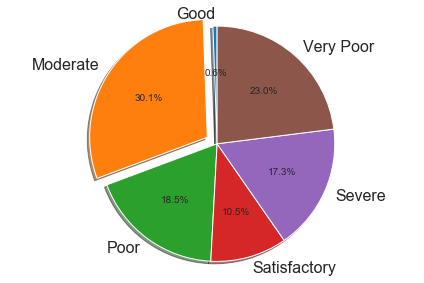

In [601]:
labels = 'Good', 'Moderate', 'Poor', 'Satisfactory', "Severe", "Very Poor"
x_axis = df_count.array
explode = (0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(x_axis, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#centre_circle = plt.Circle((0,0),0.70,fc='white')
#fig = plt.gcf()
#fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("AQI category Variation in Anand Vihar, New Delhi in Year 2019 ")
plt.tight_layout()
plt.show()

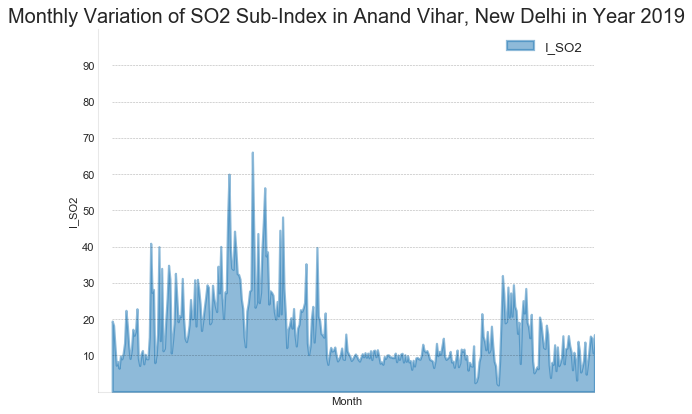

In [602]:
x = df['Date-Month'].values.tolist()
y1 = df['I_SO2'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      

fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label="I_SO2", alpha=0.5, color=mycolors[1], linewidth=2)

ax.set_title('Monthly Variation of SO2 Sub-Index in Anand Vihar, New Delhi in Year 2019', fontsize=18)
ax.set(ylim=[0, 100])
ax.legend(loc='best', fontsize=12)
plt.xticks(np.array(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]), fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(10, 100 , 10), fontsize=10)
plt.xlim(-10, x[-1])

for y in np.arange(10, 100 , 10):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.1)
ax.set_xlabel('Month', fontsize = 10)
ax.set_ylabel('I_SO2', fontsize = 10)

plt.show()

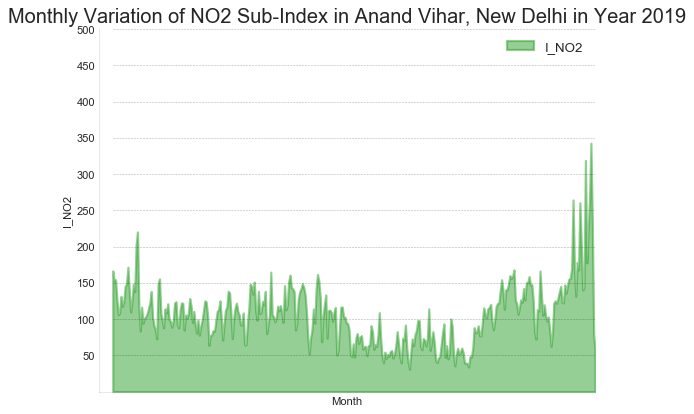

In [603]:
x = df['Date-Month'].values.tolist()
y1 = df['I_NO2'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      

fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label="I_NO2", alpha=0.5, color=mycolors[2], linewidth=2)

ax.set_title('Monthly Variation of NO2 Sub-Index in Anand Vihar, New Delhi in Year 2019', fontsize=18)
ax.set(ylim=[0, 500])
ax.legend(loc='best', fontsize=12)
plt.xticks(np.array(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]), fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(50, 550 , 50), fontsize=10)
plt.xlim(-10, x[-1])

for y in np.arange(50, 550 , 50):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.1)
ax.set_xlabel('Month', fontsize = 10)
ax.set_ylabel('I_NO2', fontsize = 10)

plt.show()

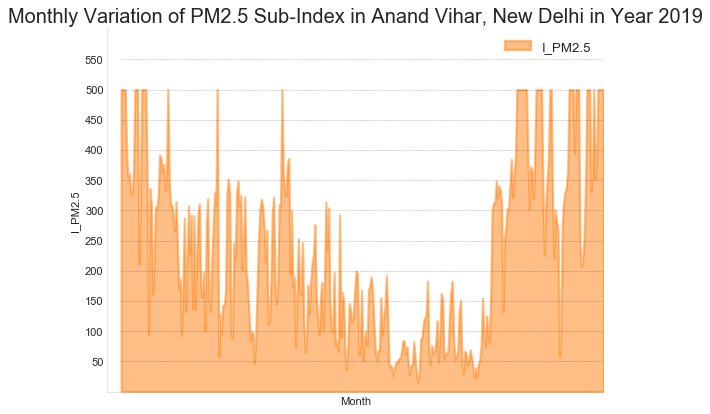

In [604]:
x = df['Date-Month'].values.tolist()
y1 = df['I_PM2.5'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      

fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label="I_PM2.5", alpha=0.5, color=mycolors[3], linewidth=2)

ax.set_title('Monthly Variation of PM2.5 Sub-Index in Anand Vihar, New Delhi in Year 2019', fontsize=18)
ax.set(ylim=[0, 600])
ax.legend(loc='best', fontsize=12)
plt.xticks(np.array(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]), fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(50, 600 , 50), fontsize=10)
plt.xlim(-10, x[-1])

for y in np.arange(50, 600 , 50):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.1)
ax.set_xlabel('Month', fontsize = 10)
ax.set_ylabel('I_PM2.5', fontsize = 10)

plt.show()

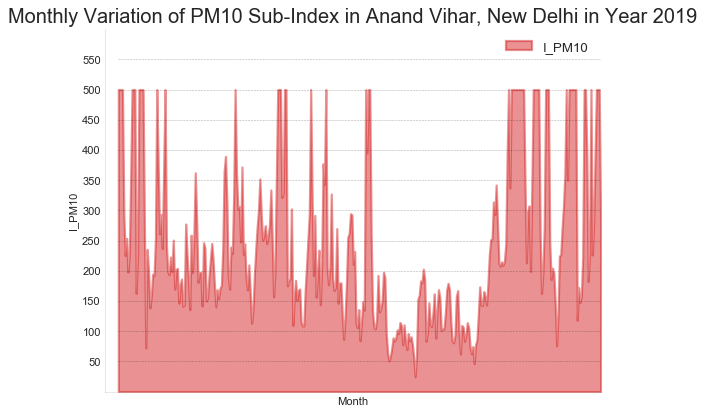

In [605]:
x = df['Date-Month'].values.tolist()
y1 = df['I_PM10'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      

fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label="I_PM10", alpha=0.5, color=mycolors[0], linewidth=2)

ax.set_title('Monthly Variation of PM10 Sub-Index in Anand Vihar, New Delhi in Year 2019', fontsize=18)
ax.set(ylim=[0, 600])
ax.legend(loc='best', fontsize=12)
plt.xticks(np.array(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]), fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(50, 600 , 50), fontsize=10)
plt.xlim(-10, x[-1])

for y in np.arange(50, 600 , 50):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.1)
ax.set_xlabel('Month', fontsize = 10)
ax.set_ylabel('I_PM10', fontsize = 10)

plt.show()

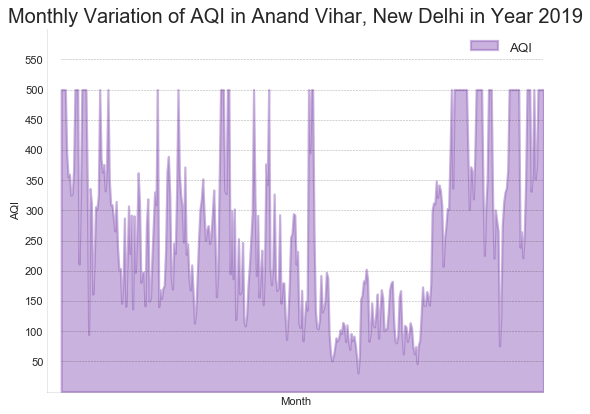

In [606]:
x = df['Date-Month'].values.tolist()
y1 = df['AQI'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:purple']      

fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label="AQI", alpha=0.5, color=mycolors[7], linewidth=2)

ax.set_title('Monthly Variation of AQI in Anand Vihar, New Delhi in Year 2019', fontsize=18)
ax.set(ylim=[0, 600])
ax.legend(loc='best', fontsize=12)
plt.xticks(np.array(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]), fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(50, 600 , 50), fontsize=10)
plt.xlim(-10, x[-1])

for y in np.arange(50, 600 , 50):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.1)
ax.set_xlabel('Month', fontsize = 10)
ax.set_ylabel('AQI', fontsize = 10)

plt.show()

In [607]:
df.head(31)

,From Date,To Date,PM2.5,PM10,NO2,SO2,Month,Date-Month,I_PM10,I_SO2,I_PM2.5,I_NO2,AQI,AQI_category
1,01-01-2019,02-01-2019,380.23,555.57,146.50,15.56,01,01-01,500.000000,19.4500,500.000000,166.500000,500.000000,Severe
2,02-01-2019,03-01-2019,418.47,622.37,132.76,14.59,01,02-01,500.000000,18.2375,500.000000,152.760000,500.000000,Severe
3,03-01-2019,04-01-2019,412.89,570.40,134.30,9.99,01,03-01,500.000000,12.4875,500.000000,154.300000,500.000000,Severe
4,04-01-2019,05-01-2019,291.95,431.19,107.19,5.81,01,04-01,500.000000,7.2625,500.000000,127.190000,500.000000,Severe
5,05-01-2019,06-01-2019,241.67,343.16,85.87,6.63,01,05-01,293.160000,8.2875,393.607209,105.870000,393.607209,Very poor
6,06-01-2019,07-01-2019,191.85,275.35,88.34,5.15,01,06-01,225.350000,6.4375,355.373256,108.340000,355.373256,Very poor
7,07-01-2019,08-01-2019,197.84,303.64,111.34,7.88,01,07-01,253.640000,9.8500,359.970233,131.340000,359.970233,Very poor
8,08-01-2019,09-01-2019,152.66,246.71,97.46,7.22,01,08-01,197.814027,9.0250,325.297209,117.460000,325.297209,Very poor
9,09-01-2019,10-01-2019,155.26,276.36,103.86,8.46,01,09-01,226.360000,10.5750,327.292558,123.860000,327.292558,Very poor
10,10-01-2019,11-01-2019,205.47,395.21,125.18,10.76,01,10-01,356.402405,13.4500,365.825814,145.180000,365.825814,Very poor


In [608]:
df["Month"] = df["Month"].astype(int)
dfmonth = df.groupby("Month").mean()
dfmonth = dfmonth.reset_index()
dfmonth.index +=1
cat = ["Severe", "Very poor", "Poor", "Satisfactory", "Moderate", "Good"]
for x in dfmonth.index:
    for con in cat:
        df1 = df[df["Month"] == x]
        y = df1[df1["AQI_category"] == con].shape[0]
        dfmonth.loc[x, con] = y
dfmonth

,Month,PM2.5,PM10,NO2,SO2,I_PM10,I_SO2,I_PM2.5,I_NO2,AQI,Severe,Very poor,Poor,Satisfactory,Moderate,Good
1,1,234.906333,372.312000,111.330667,11.175667,334.164621,13.969583,377.360557,131.178701,380.974519,12.0,14.0,2.0,1.0,1.0,0.0
2,2,142.169000,281.652000,86.544500,17.092000,230.437251,21.365000,279.024004,105.487064,284.912682,1.0,9.0,7.0,0.0,3.0,0.0
3,3,106.829032,258.511935,81.560968,19.155484,218.023450,23.944355,221.982452,100.065021,246.358630,1.0,8.0,8.0,0.0,14.0,0.0
4,4,98.053667,297.538333,92.482333,26.331667,257.017776,32.902011,212.137775,111.608145,261.120264,1.0,8.0,14.0,0.0,7.0,0.0
5,5,112.418667,289.088667,102.529333,20.142333,265.983018,25.170474,227.960650,122.149419,277.709642,6.0,5.0,8.0,0.0,11.0,0.0
6,6,73.312333,264.922667,84.147667,12.141667,226.451375,15.177083,148.783395,102.158517,227.212525,1.0,4.0,10.0,1.0,14.0,0.0
7,7,54.239032,186.176774,52.481935,7.797097,174.524745,9.746371,103.248784,65.430633,175.557050,3.0,1.0,3.0,8.0,16.0,0.0
8,8,41.761724,122.827586,53.668621,7.598276,111.710252,9.497845,72.060971,66.844279,112.168712,0.0,0.0,1.0,13.0,14.0,1.0
9,9,43.407000,119.660667,45.557000,7.662667,110.076215,9.578333,78.162916,56.861139,110.544057,0.0,0.0,0.0,12.0,17.0,1.0
10,10,153.453548,324.724194,93.173548,11.058710,284.065609,13.823387,275.845610,111.730819,305.209223,7.0,12.0,3.0,1.0,8.0,0.0


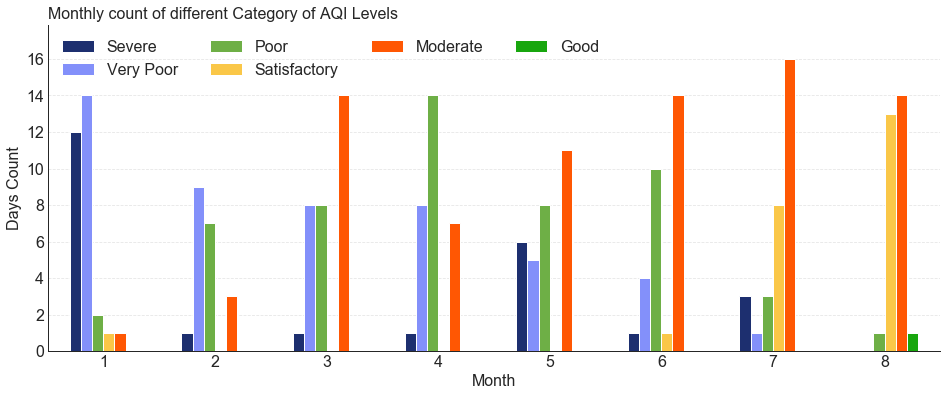

In [618]:
x_tik = np.array(["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct","Nov","Dec"])
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(dfmonth.index)) *2
# plot bars
plt.bar(x - 0.5, dfmonth['Severe'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.3, dfmonth['Very poor'], width = 0.2, color = '#8390FA')
plt.bar(x - 0.1, dfmonth['Poor'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.1, dfmonth['Satisfactory'], width = 0.2, color = '#FAC748')
plt.bar(x + 0.3, dfmonth['Moderate'], width = 0.2, color = '#FF5703')
plt.bar(x + 0.5, dfmonth['Good'], width = 0.2, color = '#18A60E')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Days Count')
plt.xlabel('Month')
plt.xticks(x, dfmonth.index)
plt.xlim(-1, 15)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Monthly count of different Category of AQI Levels', loc ='left')
plt.legend(['Severe', 'Very Poor', 'Poor', 'Satisfactory','Moderate','Good'], loc='upper left', ncol = 4)
plt.show()